In [132]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os

# Data Import via yfinance and analysis 

In [133]:
initial_data = yf.download("TSLA ^VIX", start="2020-10-02", end="2021-10-01")


[*********************100%***********************]  2 of 2 completed


In [134]:
initial_data.head()


Adj Close                  Close                   High  \
                  TSLA       ^VIX        TSLA       ^VIX        TSLA   
Date                                                                   
2020-10-01  448.160004  26.700001  448.160004  26.700001  448.880005   
2020-10-02  415.089996  27.629999  415.089996  27.629999  439.130005   
2020-10-05  425.679993  27.959999  425.679993  27.959999  433.640015   
2020-10-06  413.980011  29.480000  413.980011  29.480000  428.779999   
2020-10-07  425.299988  28.059999  425.299988  28.059999  429.899994   

                              Low                   Open               Volume  \
                 ^VIX        TSLA       ^VIX        TSLA       ^VIX      TSLA   
Date                                                                            
2020-10-01  27.110001  434.420013  25.330000  440.760010  25.780001  50741500   
2020-10-02  29.900000  415.000000  26.930000  421.390015  28.870001  71430000   
2020-10-05  29.690001  419.329987  27.270000  423.350006  29.520000  44722800   
2020-10-06  30.000000  406.049988  26.010000  423.790009  28.049999  49146300   
2020-10-07  29.760000  413.850006  27.940001  419.869995  29.260000  43127700   

                 
           ^VIX  
Date             
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0  
2020-10-07    0

In [135]:
initial_data['Adj Close'].head()

,TSLA,^VIX
Date,,
2020-10-01,448.160004,26.700001
2020-10-02,415.089996,27.629999
2020-10-05,425.679993,27.959999
2020-10-06,413.980011,29.480000
2020-10-07,425.299988,28.059999


In [136]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-01 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [137]:
data.head()

,TSLA,^VIX
Date,,
2020-10-01,448.160004,26.700001
2020-10-02,415.089996,27.629999
2020-10-05,425.679993,27.959999
2020-10-06,413.980011,29.480000
2020-10-07,425.299988,28.059999


In [138]:
data.tail()

,TSLA,^VIX
Date,,
2021-09-24,774.390015,17.750000
2021-09-27,791.359985,18.760000
2021-09-28,777.559998,23.250000
2021-09-29,781.309998,22.559999
2021-09-30,775.479980,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

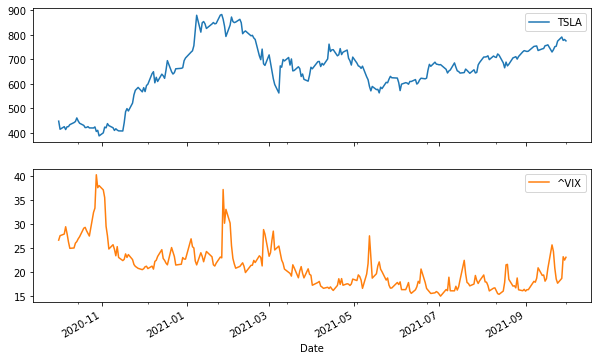

In [140]:
data.plot(figsize=(10, 6), subplots=True)

In [142]:
bvol = data["TSLA"]
log_return = np.log(bvol / bvol.shift(1))

In [143]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 53.53 %


In [144]:
vix = data['^VIX'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


# Rolling Statistics

In [141]:
data.describe().round(2)

,TSLA,^VIX
count,252.00,252.00
mean,654.48,21.27
std,118.31,4.62
min,388.04,15.07
25%,604.82,17.68
50%,669.27,20.78
75%,729.49,23.25
max,883.09,40.28


In [111]:
sym = 'TSLA'
TSLA_data = pd.DataFrame(data[sym]).dropna()
TSLA_data.tail()

,TSLA
Date,
2021-09-24,774.390015
2021-09-27,791.359985
2021-09-28,777.559998
2021-09-29,781.309998
2021-09-30,775.479980


In [107]:
window = 10
TSLA_data['min'] = data[sym].rolling(window=window).min()
TSLA_data['mean'] = data[sym].rolling(window=window).mean()
TSLA_data['std'] = data[sym].rolling(window=window).std()
TSLA_data['median'] = data[sym].rolling(window=window).median()
TSLA_data['max'] = data[sym].rolling(window=window).max()
TSLA_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
TSLA_data.dropna().head()

,TSLA,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-14,461.299988,413.980011,433.837997,15.430964,429.960007,461.299988,457.201682
2020-10-15,448.880005,413.980011,433.909998,15.506709,429.960007,461.299988,450.960423
2020-10-16,439.670013,413.980011,436.367999,14.073970,436.835007,461.299988,442.492615
2020-10-19,430.829987,413.980011,436.882999,13.729423,436.835007,461.299988,433.745644
2020-10-20,421.940002,421.940002,437.678998,12.422577,436.835007,461.299988,424.891413


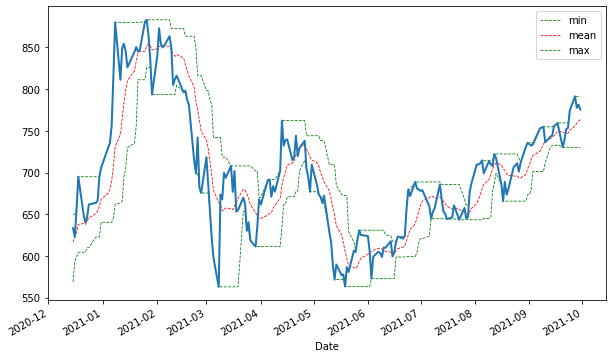

In [108]:
ax = TSLA_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [112]:
TSLA_data['SMA1'] = data[sym].rolling(window=20).mean()
TSLA_data['SMA2'] = data[sym].rolling(window=60).mean()
TSLA_data[[sym, 'SMA1', 'SMA2']].tail()

,TSLA,SMA1,SMA2
Date,,,
2021-09-24,774.390015,744.291998,701.074496
2021-09-27,791.359985,748.263998,702.965163
2021-09-28,777.559998,750.596500,704.609496
2021-09-29,781.309998,752.876001,706.638329
2021-09-30,775.479980,754.945499,708.818828


<AxesSubplot:xlabel='Date'>

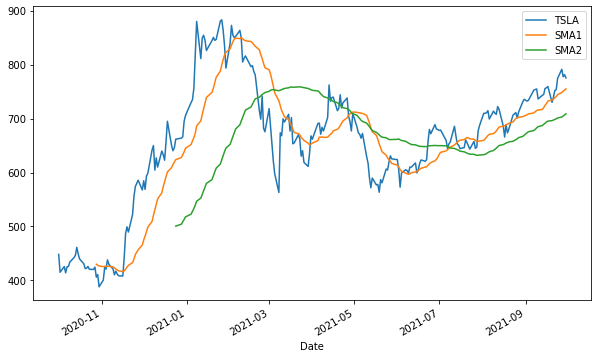

In [113]:
TSLA_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

# Correlation Analysis

In [115]:
Corr_data = data[['TSLA', '^VIX']].dropna()
Corr_data.tail()

,TSLA,^VIX
Date,,
2021-09-24,774.390015,17.750000
2021-09-27,791.359985,18.760000
2021-09-28,777.559998,23.250000
2021-09-29,781.309998,22.559999
2021-09-30,775.479980,23.139999


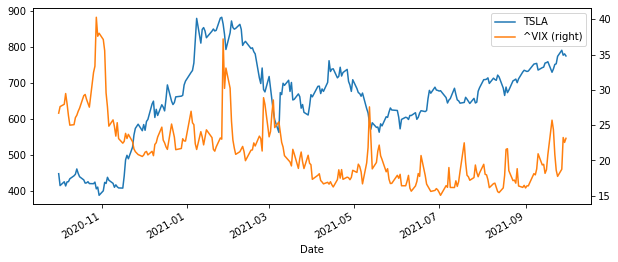

In [117]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 4));


# Logarithmic Returns

In [118]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,TSLA,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.076655,0.034239
2020-10-05,0.025193,0.011873
2020-10-06,-0.027870,0.052937
2020-10-07,0.026977,-0.049367


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

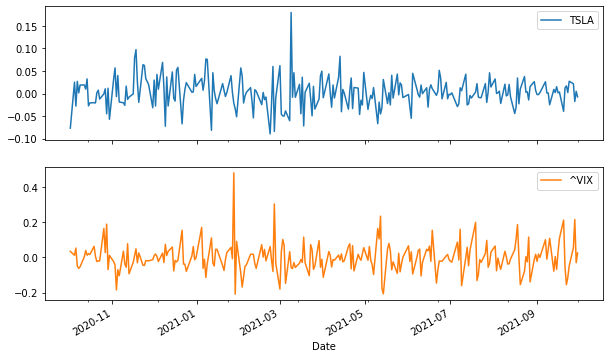

In [119]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='TSLA', ylabel='TSLA'>,
        <AxesSubplot:xlabel='^VIX', ylabel='TSLA'>],
       [<AxesSubplot:xlabel='TSLA', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

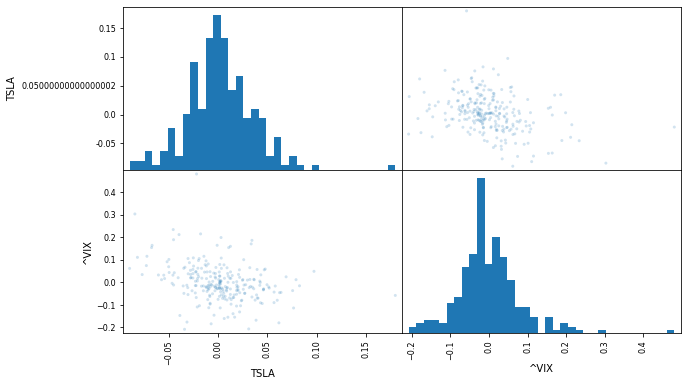

In [122]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

# OLS Regression

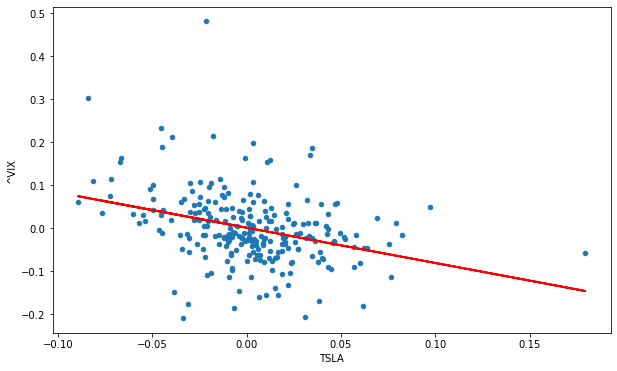

In [124]:
reg = np.polyfit(sprets['TSLA'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='TSLA', y='^VIX', figsize=(10, 6))
ax.plot(sprets['TSLA'], np.polyval(reg, sprets['TSLA']), 'r', lw=2);

# Correlation


In [125]:
sprets.corr()

,TSLA,^VIX
TSLA,1.000000,-0.333214
^VIX,-0.333214,1.000000


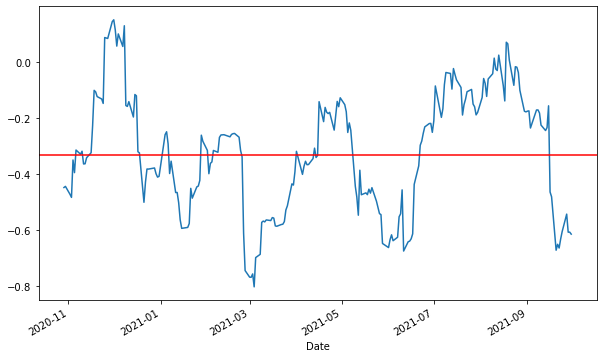

In [126]:
ax = sprets['TSLA'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');

# Binomial Tree

In [24]:
S0 = 775.48             # Spot price
K = 770.0               # Strike
T = 1.0                 # Time to maturity 
r = 0.0138              # Risk free rate 
sig = 0.5353            # Volatility
N = 3                   # Number of periods 
payoff = "put"          # Payoff 

In [25]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # Up factor
d = 1.0 / u                                   # Down factor 

In [26]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [27]:
S

array([[ 775.48      , 1056.31085538, 1438.84126371, 1959.9005081 ],
       [   0.        ,  569.31084949,  775.48      , 1056.31085538],
       [   0.        ,    0.        ,  417.95383936,  569.31084949],
       [   0.        ,    0.        ,    0.        ,  306.8366113 ]])

In [28]:
a = np.exp(r * dT)    # Risk free compound return
p = (a - d)/ (u - d)  # Risk neutral up probability
q = 1.0 - p           # Risk neutral down probability
p

0.4306870085176459

In [29]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 200.68915051],
       [  0.        ,   0.        ,   0.        , 463.1633887 ]])

In [30]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[168.3210439 ,  64.45113564,   0.        ,   0.        ],
       [  0.        , 248.26209763, 113.73057487,   0.        ],
       [  0.        ,   0.        , 352.04616064, 200.68915051],
       [  0.        ,   0.        ,   0.        , 463.1633887 ]])

In [31]:
print('American ' + payoff, str( V[0,0]))

American put 168.32104390456584


# Monte Carlo Simulation

In [32]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [33]:
T = 1
r = 0.0138
sigma = 0.5353
S0 = 775.48
K = 770.0

In [34]:
S = mcs_simulation_np(1000)

In [35]:
S = np.transpose(S)
S

array([[ 775.48      ,  783.37717183,  783.77210575, ...,  583.59119138,
         582.7413202 ,  590.1770736 ],
       [ 775.48      ,  776.26639404,  780.989703  , ...,  660.97997338,
         647.97272121,  652.4991924 ],
       [ 775.48      ,  767.26026564,  760.32694496, ..., 1107.00395516,
        1095.39355678, 1075.99587585],
       ...,
       [ 775.48      ,  776.85814262,  775.06472176, ...,  652.69730859,
         665.26593192,  646.08862612],
       [ 775.48      ,  808.44803919,  833.98535398, ...,  967.32799697,
         957.22956569,  980.81798706],
       [ 775.48      ,  793.82487227,  781.42851534, ...,  379.43640964,
         380.24973436,  380.42629943]])

In [36]:
S = mcs_simulation_np(10000)

In [37]:
S = np.transpose(S)
S

array([[ 775.48      ,  768.55333527,  769.76769641, ...,  695.03424465,
         690.37627782,  686.56635391],
       [ 775.48      ,  771.01664101,  770.05526417, ..., 1519.25941347,
        1512.95446472, 1512.07503987],
       [ 775.48      ,  783.6966709 ,  780.12936601, ..., 1168.28296885,
        1161.49989191, 1165.40534624],
       ...,
       [ 775.48      ,  770.65917769,  774.81938006, ...,  707.77623458,
         707.82872202,  707.74253063],
       [ 775.48      ,  769.03329925,  764.63136972, ..., 1270.63160251,
        1278.96365782, 1276.01552564],
       [ 775.48      ,  783.7265058 ,  777.58963621, ...,  359.89993956,
         361.20589083,  358.98434765]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

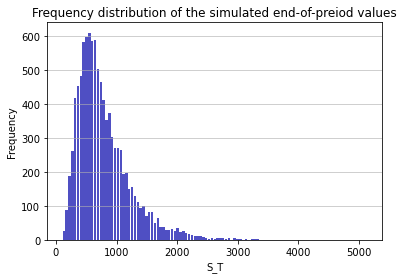

In [38]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [39]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('TSLA put', str(p))

TSLA put 155.09633382733148


## Greeks

# Delta

In [40]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [41]:
delta(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')


-0.3795442460783558

In [42]:
S = np.linspace(1,2500,50)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 775.48, 1, 0.0138, 0.0, 0.5353, 'put')

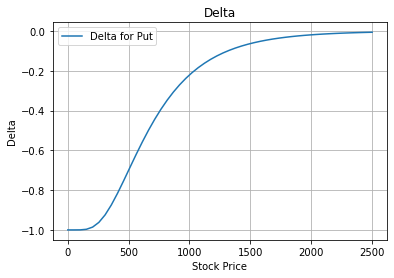

In [43]:
fig = plt.figure()
plt.plot(S, Delta_Put)
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Surface of Delta

In [44]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [45]:
S = np.linspace(1, 2500, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 775.48, T[i], 0.0138, 0.00, 0.5353, 'put')

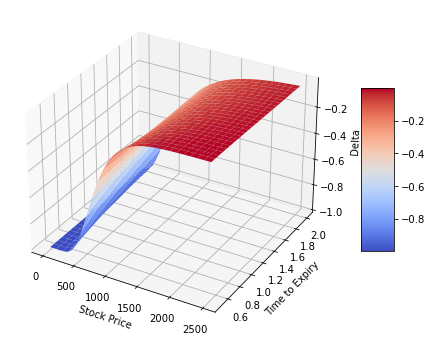

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [103]:
d = delta(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.3795 . If the stock price increase 1 dollar, then the value of the option will increase $ -0.3795 .


# Gamma

In [47]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [48]:
gamma(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')

0.0009168941934260377

In [49]:
S = np.linspace(1,2500,50)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 770.0, 1, 0.0138, 0.00, 0.5353, 'put')

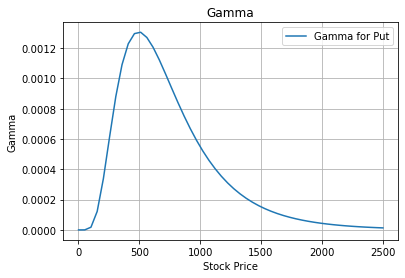

In [50]:
fig = plt.figure()
plt.plot(S, Gamma)
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Surface of Gamma

In [51]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [52]:
S = np.linspace(50, 1500, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

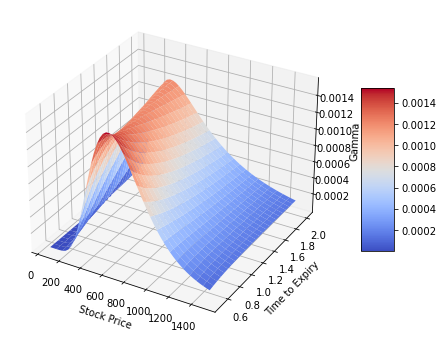

In [53]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [54]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [55]:
speed(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')


-1.8597394812247154e-06

In [56]:
S = np.linspace(1,2000,50)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 770.0, 1, 0.0138, 0.00, 0.5353, 'put')

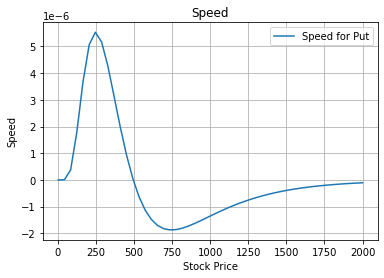

In [57]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

# Surface of Speed

In [58]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [61]:
S = np.linspace(100,1500, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

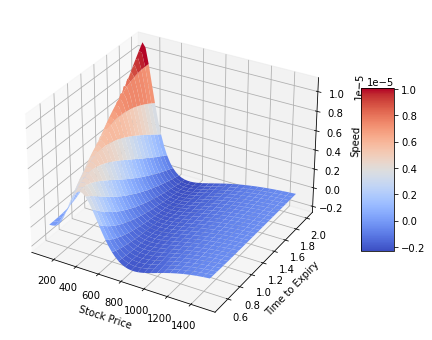

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [158]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [159]:
theta(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')

-72.81179954596482

In [160]:
T = np.linspace(0.25,3,50)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(775.48, 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

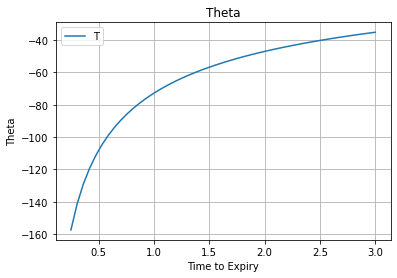

In [161]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend('Theta for Put')

# Surface of Theta

In [165]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [168]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.01, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

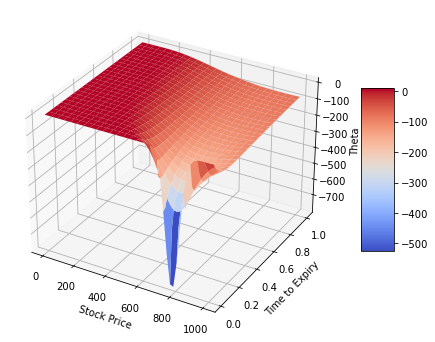

In [169]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [54]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [55]:
rho(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')

-448.39165950204875

In [56]:
r = np.linspace(0,0.1,50)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(775.48, 770.0, 1, r[i], 0.00, 0.5353, 'put')

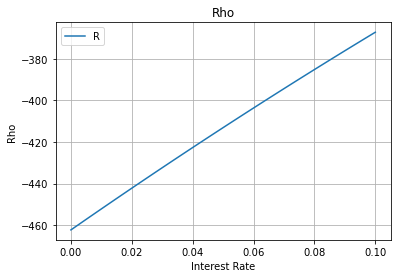

In [57]:
fig = plt.figure()
plt.plot(r, Rho_Put)
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend('Rho for Put')

# Surface of Rho

In [72]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [90]:
S = np.linspace(500, 3000, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

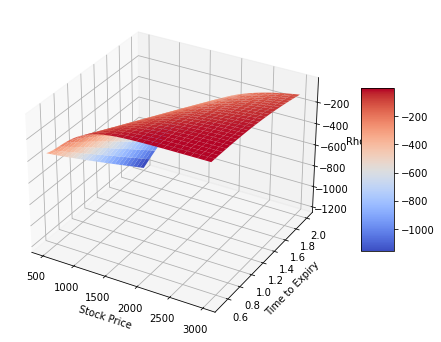

In [91]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [58]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [59]:
vega(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')

295.16011375711975

In [60]:
vol = np.linspace(0.1,0.4,50)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(775.48, 770.0, 1, 0.0138, 0.00, vol[i], 'put')

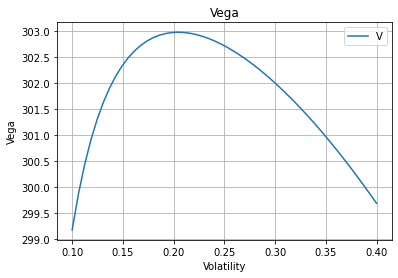

In [61]:
fig = plt.figure()
plt.plot(vol, Vega)
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend('Vega for Put')

# Surface of Vega

In [92]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [99]:
S = np.linspace(50, 2000, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 770.0, T[i], 0.0138, 0.00, 0.5353, 'put')

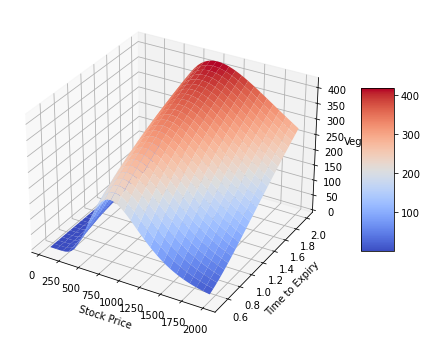

In [100]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [101]:
v = vega(775.48, 770.0, 1, 0.0138, 0.00, 0.5353, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 295.1601 . If the volatility increases 1%, then the value of the option will increase $ 2.951601 .
